In [1]:
print(1)

1


In [2]:
!pip install wfdb

  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached aiohttp-3.13.3-cp310-cp310-win_amd64.whl (456 kB)
  Using cached requests-2.32.5-py3-none-any.whl (64 kB)
  Using cached pandas-2.3.3-cp310-cp310-win_amd64.whl (11.3 MB)
  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached fsspec-2026.2.0-py3-none-any.whl (202 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl (6.2 kB)
  Using cached yarl-1.22.0-cp310-cp310-win_amd64.whl (86 kB)
  Using cached multidict-6.7.1-cp310-cp310-win_amd64.whl (46 kB)
  Using cached attrs-25.4.0-py3-none-any.whl (67 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
  Using cached propcache-0.4.1-cp310-cp310-win_amd64.whl (41 kB)
  Using cached frozenlist-1.8.0-cp310-cp310-win_amd64.whl (43 kB)
  Using cached fonttools-4.61.1-cp310-cp310-win_amd64.whl (1.6 MB)
  Usi

You should consider upgrading via the 'C:\Users\PC\Desktop\medgemma_hack\medgemma-sentinel\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import wfdb
import pandas as pd

# Define the record path as specified in the usage notes
# Format: mimic3wdb/[intermediate_dir]/[record_dir]/[record_name]
record_name = '3000100n'
pn_dir = 'mimic3wdb/30/3000100/'

print(f"Streaming record {record_name} from PhysioNet...")

try:
    # 1. Read the record directly from PhysioNet (Streaming)
    # physical=True converts raw units to real values (mmHg, bpm, etc.)
    record = wfdb.rdrecord(record_name, pn_dir=pn_dir, physical=True)

    # 2. Convert to a Pandas DataFrame
    df = pd.DataFrame(record.p_signal, columns=record.sig_name)

    # 3. Add a timestamp column (assuming 1Hz sampling as per documentation)
    # The 'fs' attribute gives the sampling frequency
    df.insert(0, 'Elapsed_Time_Sec', range(len(df)))

    # 4. Filter for the specific signals you requested
    # Note: MIMIC signal names can vary (e.g., 'HR', 'PULSE', 'SpO2', 'RESP', 'ABP Mean')
    available_cols = df.columns.tolist()
    print(f"Available signals in this record: {available_cols}")

    # Save to CSV
    output_file = f"{record_name}_data.csv"
    df.to_csv(output_file, index=False)
    print(f"Successfully saved to {output_file}")

except Exception as e:
    print(f"Error: {e}")

Streaming record 3000100n from PhysioNet...
Available signals in this record: ['Elapsed_Time_Sec', 'HR', 'PULSE', 'NBP Sys', 'NBP Dias', 'NBP Mean', 'RESP', 'ST III', 'ST V', 'SpO2', 'PVC Rate per Minute', 'Rhythm Status', 'Ectopic Status', 'Ectopic Count']
Successfully saved to 3000100n_data.csv


In [7]:
df

,Elapsed_Time_Sec,HR,PULSE,NBP Sys,NBP Dias,NBP Mean,RESP,ST III,ST V,SpO2,PVC Rate per Minute,Rhythm Status,Ectopic Status,Ectopic Count
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,10385,62.0,62.0,132.0,76.0,91.0,20.0,NaN,NaN,98.0,6.0,63011.0,63052.0,1.0
10386,10386,62.0,62.0,132.0,76.0,91.0,20.0,NaN,NaN,98.0,5.0,63011.0,63052.0,1.0
10387,10387,62.0,62.0,132.0,76.0,91.0,20.0,NaN,NaN,97.0,5.0,63011.0,63052.0,1.0
10388,10388,62.0,62.0,132.0,76.0,91.0,20.0,NaN,NaN,97.0,5.0,63011.0,63052.0,1.0


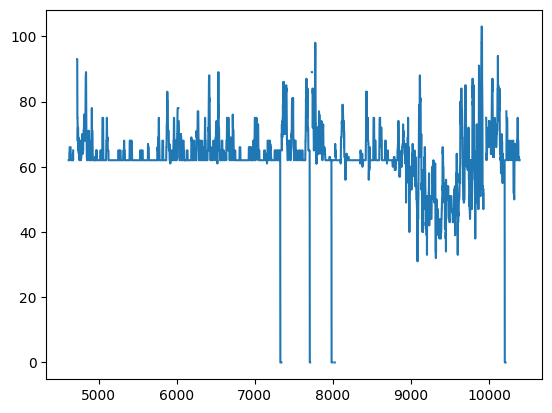

In [8]:
import matplotlib.pylab as plt

plt.plot(df['HR'])

In [3]:
lists_adult = ['30/3016412/', '31/3190202/', '33/3362386/', '34/3448214/', '35/3570073/', '36/3618048/', '37/3722620/', '38/3864557/', '39/3924317/', '32/3297027/', ]
list_neonate = ['30/3015794/', '31/3182898/', '32/3220897/', '33/3306334/', '34/3479334/', '35/3571719/', '36/3632888/', '37/3716249/', '38/3875566/', '39/3998381/',  ]

In [6]:
import os
import wfdb
import pandas as pd

# Create output directory if it doesn't exist
output_dir = '../data/raw/hr_mimic_iii/'
os.makedirs(output_dir, exist_ok=True)

def scrape_and_save(record_dirs, category):
    """
    Scrape MIMIC-III records and save them as CSV files.
    
    Args:
        record_dirs: List of directory paths (e.g., ['30/3016412/', ...])
        category: 'adult' or 'neonate' for filename prefixing
    """
    for record_dir in record_dirs:
        # Extract record name from path (e.g., '3016412' from '30/3016412/')
        record_name = record_dir.strip('/').split('/')[-1]+'n'  # Append 'n'
        
        # Construct full PhysioNet directory path
        pn_dir = f'mimic3wdb/{record_dir}'
        
        print(f"Processing {category}: {record_name}...")
        
        try:
            # Read the record directly from PhysioNet
            record = wfdb.rdrecord(record_name, pn_dir=pn_dir, physical=True)
            
            # Convert to DataFrame
            df = pd.DataFrame(record.p_signal, columns=record.sig_name)
            
            # Add timestamp column
            df.insert(0, 'Elapsed_Time_Sec', range(len(df)))
            
            # Save to CSV with category prefix
            output_file = os.path.join(output_dir, f"{category}_{record_name}.csv")
            df.to_csv(output_file, index=False)
            
            print(f"  ✓ Saved {category}_{record_name}.csv ({len(df)} rows, {len(df.columns)} columns)")
            print(f"  Signals: {df.columns.tolist()}\n")
            
        except Exception as e:
            print(f"  ✗ Error processing {record_name}: {e}\n")

# Process adult records
print("=" * 60)
print("SCRAPING ADULT RECORDS")
print("=" * 60)
scrape_and_save(lists_adult, 'adult')

# Process neonate records
print("\n" + "=" * 60)
print("SCRAPING NEONATE RECORDS")
print("=" * 60)
scrape_and_save(list_neonate, 'neonate')

print("\n" + "=" * 60)
print("SCRAPING COMPLETE")
print("=" * 60)

SCRAPING ADULT RECORDS
Processing adult: 3016412n...
  ✓ Saved adult_3016412n.csv (588406 rows, 19 columns)
  Signals: ['Elapsed_Time_Sec', 'HR', 'PULSE', 'ABP', 'ABP Sys', 'ABP Dias', 'ABP Mean', 'CVP', 'NBP Sys', 'NBP Dias', 'NBP Mean', 'RESP', 'ST III', 'ST V', 'SpO2', 'PVC Rate per Minute', 'Rhythm Status', 'Ectopic Status', 'Ectopic Count']

Processing adult: 3190202n...
  ✓ Saved adult_3190202n.csv (2645 rows, 48 columns)
  Signals: ['Elapsed_Time_Sec', 'HR', 'PULSE', 'NBP SYS', 'NBP DIAS', 'NBP MEAN', 'RESP', 'ST-III', 'ST-V', '%SpO2', 'PlsNBP', '[63131]', 'Atrial Paced Beat Count', 'Vent Paced Beat Count', 'Dual Paced Beat Count', 'Paced Beat Count', 'Normal Beat Count', 'SVPB Count', 'PVC Count', 'SV Count', 'Missed Beat Count', 'All Beat Count', 'SVPB Run Count', 'S Rate Max', 'S Rate Min', 'Paced Run Count', 'P Rate Max', 'P Rate Min', 'VQ Run Count', 'PVC Run Count', 'V Rate Max', 'V Rate Min', 'Max PVC Run', 'R On T Count', 'PVC Pair Count', 'Pacer Not Pace Count', 'Pacer 